In [1]:
# Install libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import emot

In [2]:
# Load the dataset
df = pd.read_csv('../data/reddit_raw.csv')  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  104 non-null    object
 1   title      104 non-null    object
 2   text       104 non-null    object
 3   url        104 non-null    object
 4   created    104 non-null    object
 5   keyword    104 non-null    object
 6   score      104 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [4]:
df.head()

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13


In [5]:
df['subreddit'].value_counts()

subreddit
ukraine            50
IsraelPalestine    50
politics            3
geopolitics         1
Name: count, dtype: int64

In [6]:
df.drop(df[df['subreddit'].isin(['politics', 'geopolitics'])].index, inplace =True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 103
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  100 non-null    object
 1   title      100 non-null    object
 2   text       100 non-null    object
 3   url        100 non-null    object
 4   created    100 non-null    object
 5   keyword    100 non-null    object
 6   score      100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 6.2+ KB


In [8]:
# Example for specific subreddit
df[df['subreddit']=='IsraelPalestine'].head()  

,subreddit,title,text,url,created,keyword,score
54,IsraelPalestine,The Pro-Palestine movement is slowly proving i...,**Important to note:**\n\n \n**I sympathize w...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-24 08:31:16,migrant,47
55,IsraelPalestine,At What Point Does Resistance Become Selfishness?,I was taking a look at some numbers of people ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-20 18:22:08,migrant,7
56,IsraelPalestine,Why do Islamic Totalitarian Theocracies get a ...,Just today Arab and Persian sources report on ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-30 00:55:36,migrant,57
57,IsraelPalestine,Myth: Israel Population Mostly Holocaust Refugees,I find the following numbers factual and persu...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-18 20:49:56,migrant,73
58,IsraelPalestine,If the IDF touches Greta thunberg it’s over….,Ya know the other day I was looking into this ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-04 19:13:57,migrant,24


In [9]:
# Example for specific subreddit
df[df['subreddit']=='ukraine'].head()  

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13


In [10]:
# Check the distribution of scores
df['score'].value_counts() 

score
6      5
14     4
30     4
19     4
8      3
      ..
132    1
202    1
112    1
161    1
23     1
Name: count, Length: 67, dtype: int64

In [11]:
df['keyword'].value_counts()

keyword
refugee                               55
refugees fleeing Russian invasion      9
internal displacement Ukraine          8
migrant                                7
border crossing                        6
eastern Ukraine                        6
immigrantUkrainian refugee             3
migration                              2
refugee in Europe                      2
asylum seeker                          1
Ukrainian war migrantGaza refugees     1
Name: count, dtype: int64

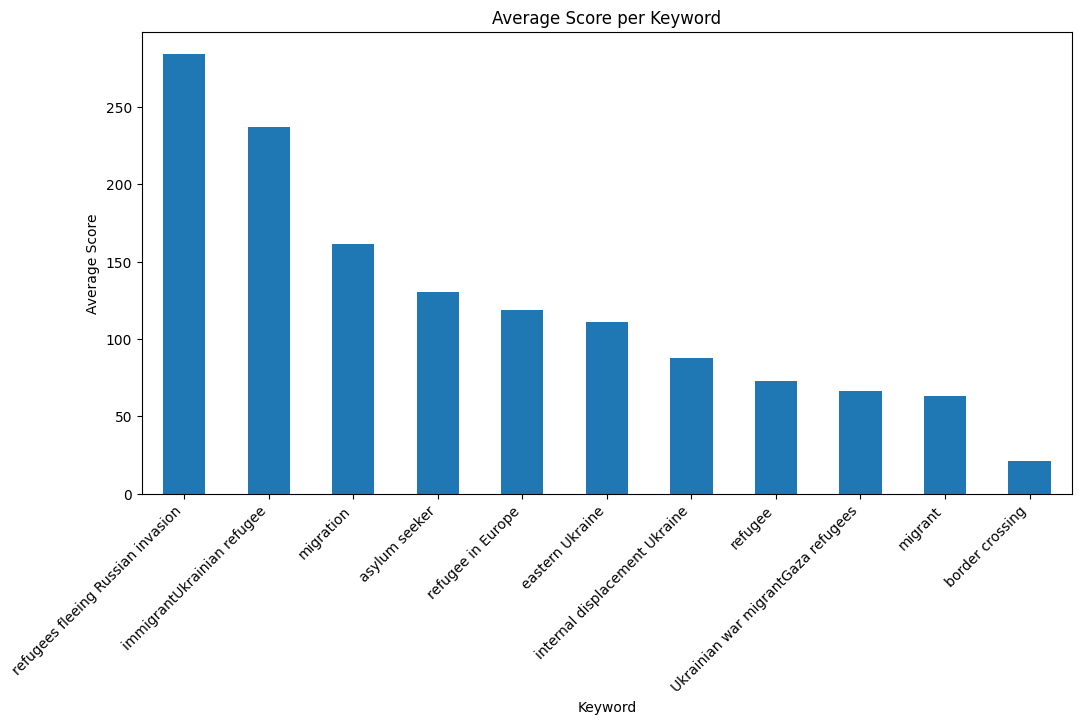

In [12]:
# Q: which keywords are most associated with higher/lower scores?
# compute average score per keyword
avg_scores = df.groupby("keyword")["score"].mean().sort_values(ascending=False)

avg_scores.plot(kind="bar", figsize=(12,6))
plt.title("Average Score per Keyword")
plt.ylabel("Average Score")
plt.xlabel("Keyword")
plt.xticks(rotation=45, ha="right")
plt.show()

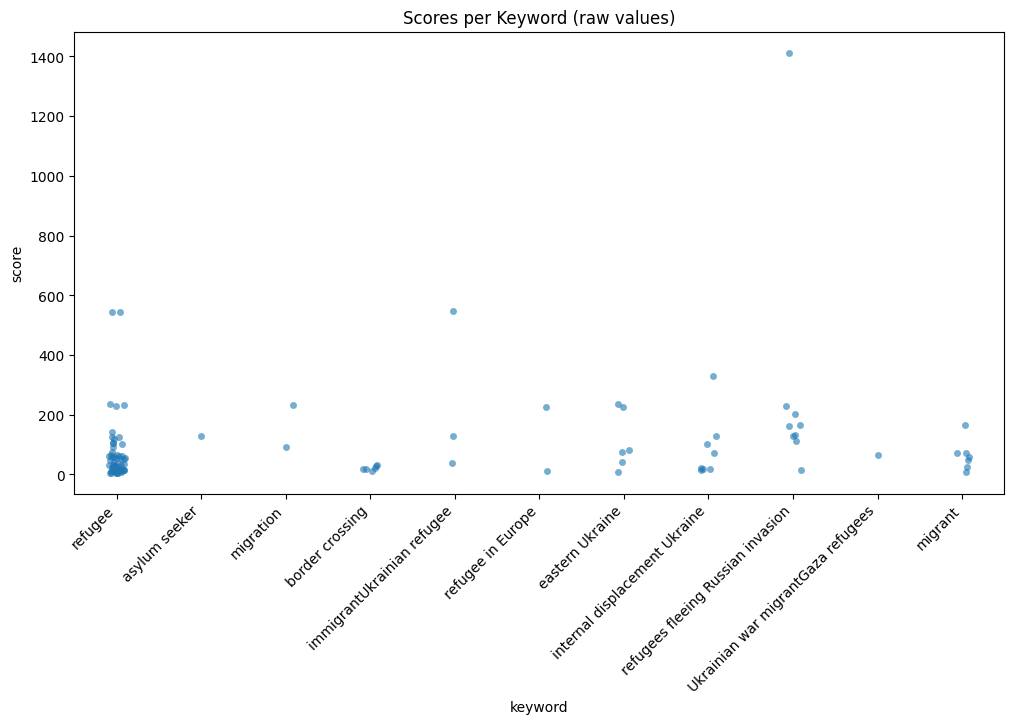

In [13]:
plt.figure(figsize=(12,6))
sns.stripplot(x="keyword", y="score", data=df, jitter=True, alpha=0.6)
plt.xticks(rotation=45, ha="right")
plt.title("Scores per Keyword (raw values)")
plt.show()

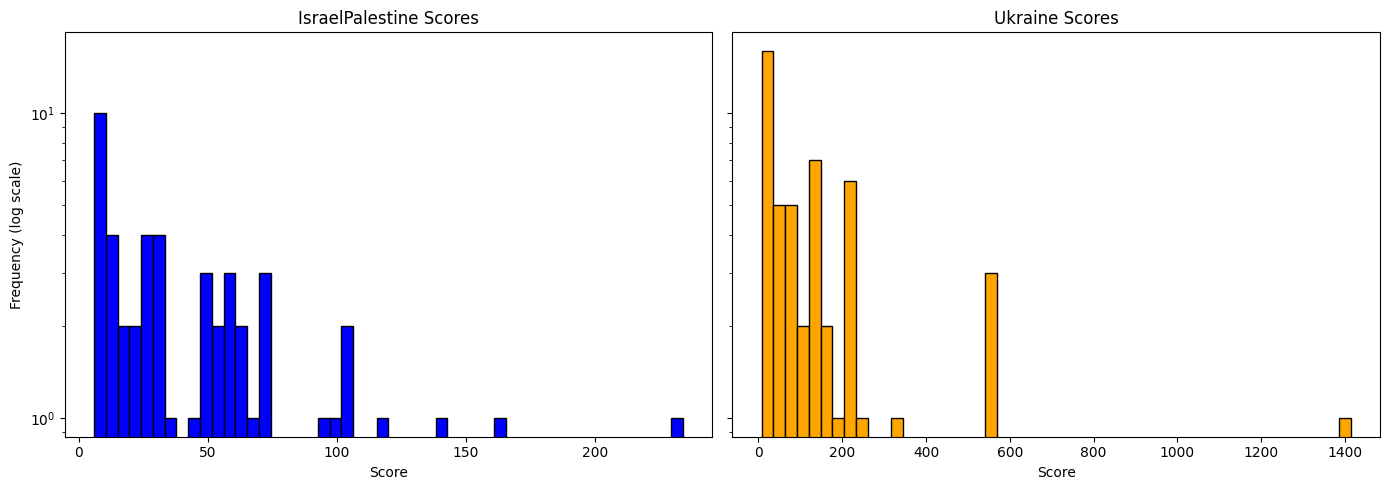

In [14]:
# Plotting the score distribution for two subreddits side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
scores_israel = df[df['subreddit'] == 'IsraelPalestine']['score']
scores_ukraine = df[df['subreddit'] == 'ukraine']['score']
axes[0].hist(scores_israel, bins=50, color='blue', edgecolor='black', log=True)
axes[0].set_title('IsraelPalestine Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency (log scale)')

axes[1].hist(scores_ukraine, bins=50, color='orange', edgecolor='black', log=True)
axes[1].set_title('Ukraine Scores')
axes[1].set_xlabel('Score')

plt.tight_layout()
plt.show()


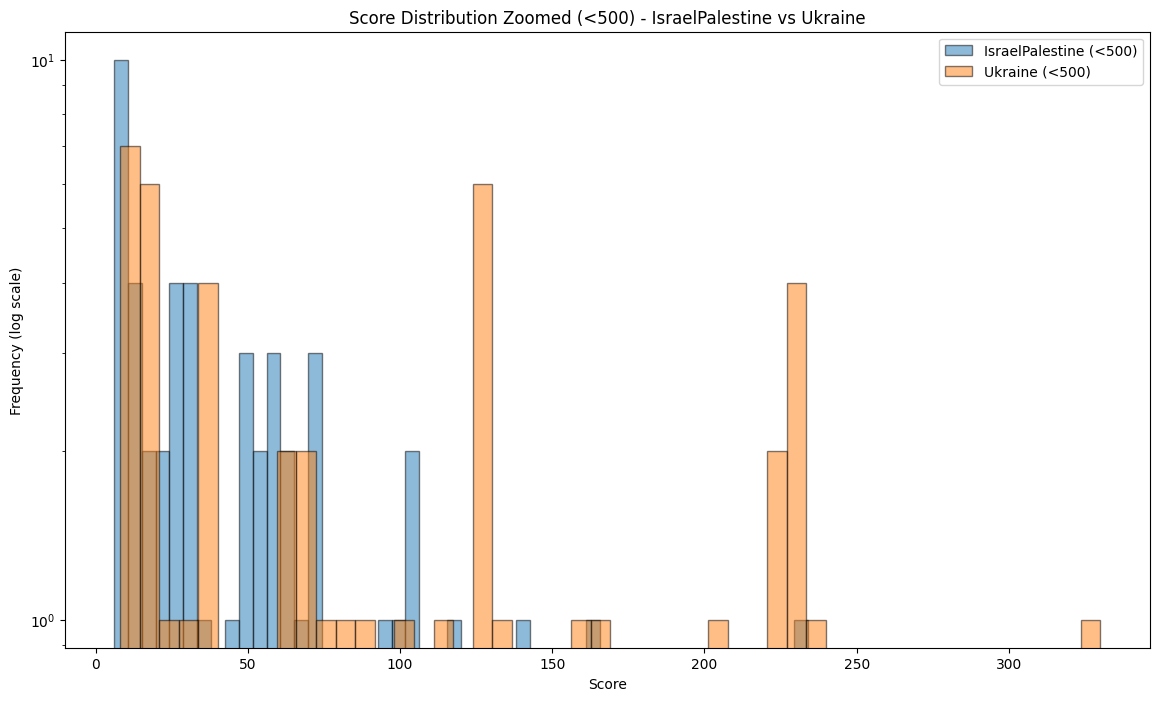

In [15]:
# Plotting the overlapped score distribution zoomed in for scores less than 500 
plt.figure(figsize=(14, 8))

plt.hist(scores_israel[scores_israel < 500], bins=50, alpha=0.5, label='IsraelPalestine (<500)', edgecolor='black', log=True)
plt.hist(scores_ukraine[scores_ukraine < 500], bins=50, alpha=0.5, label='Ukraine (<500)', edgecolor='black', log=True)

plt.title('Score Distribution Zoomed (<500) - IsraelPalestine vs Ukraine')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


Interpretation & implications:

    r/IsraelPalestine appears to have many low-engagement or newly posted items, potentially with more recent or less popular content.

    r/ukraine shows a more varied and engaged set of posts, with more posts earning medium to high scores.

    This may reflect differences in subreddit size, activity, audience engagement, or post longevity.

    It suggests Ukraine discussions might generate broader engagement, while IsraelPalestine posts might be more niche or recently posted.

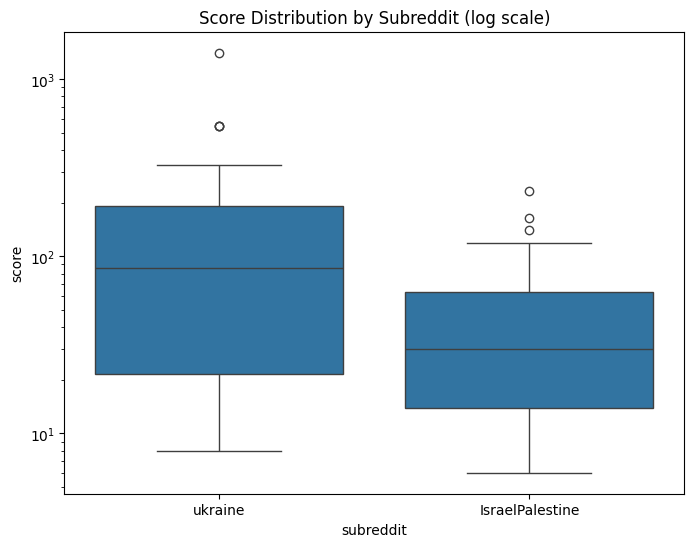

In [16]:
# Boxplot for score distribution by subreddit
plt.figure(figsize=(8, 6))
subset = df[df['subreddit'].isin(['IsraelPalestine', 'ukraine'])]
sns.boxplot(data=subset, x='subreddit', y='score')
plt.yscale('log')
plt.title('Score Distribution by Subreddit (log scale)')
plt.show()


In [17]:
df = df[df['subreddit'] != 'politics']
print(df['subreddit'].unique())

['ukraine' 'IsraelPalestine']


In [18]:
# Q: How did a specific subreddit (e.g., IsraelPalestine) perform in terms of score distribution over time?
# Convert to datetime
df['created_dt'] = pd.to_datetime(df['created'])

# Extract date only (e.g. daily granularity)
df['date'] = df['created_dt'].dt.date

<Figure size 1400x600 with 0 Axes>

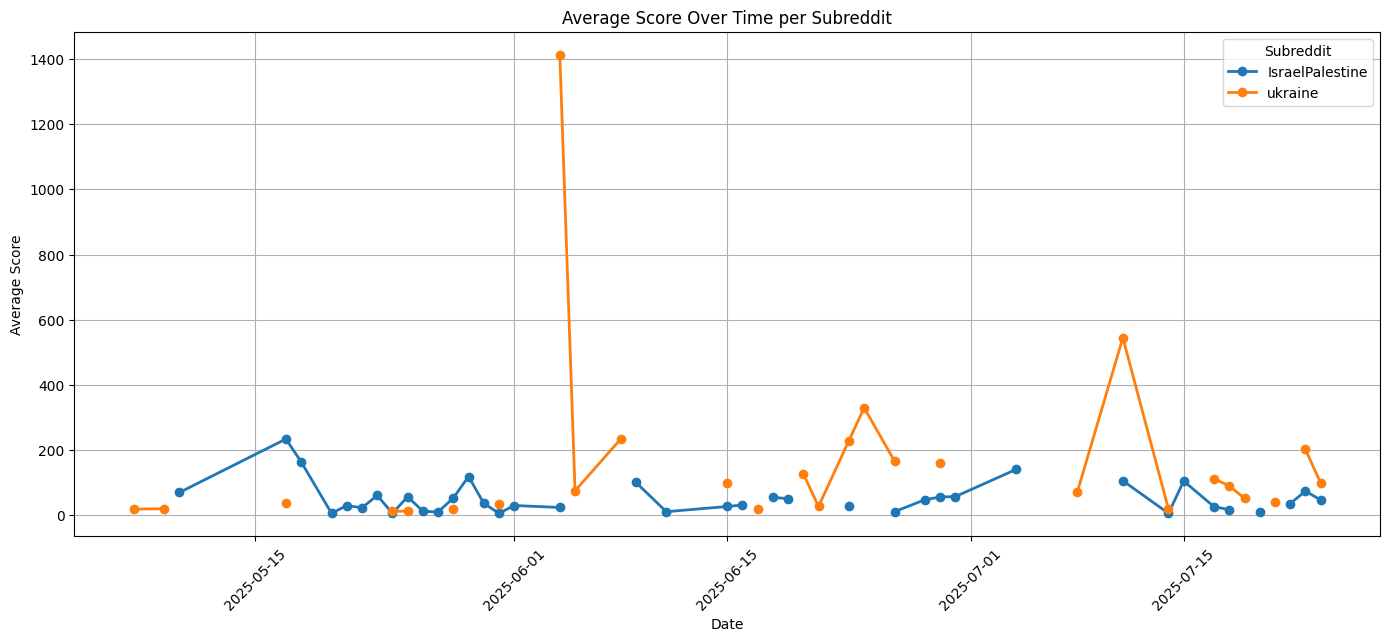

In [19]:
# Group by date and subreddit
score_by_date = df.groupby(['date', 'subreddit'])['score'].mean().reset_index()

# Pivot for plotting
score_pivot = score_by_date.pivot(index='date', columns='subreddit', values='score')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
score_pivot.plot(kind='line', marker='o', linewidth=2, figsize=(14, 6))

plt.title('Average Score Over Time per Subreddit')
plt.xlabel('Date')
plt.ylabel('Average Score')
plt.grid(True)
plt.legend(title='Subreddit')
plt.tight_layout()
plt.xticks(rotation=45) 
plt.show()

In [20]:
# Q: What's the post with the highest score in the 'ukraine' subreddit?
print(df.loc[df[df['subreddit'] == 'ukraine']['score'].idxmax()])

subreddit                                               ukraine
title                            What’s with the silence, West?
text          We all noticed Trump's clogged pipes after the...
url           https://www.reddit.com/r/ukraine/comments/1l30...
created                                     2025-06-04 10:12:58
keyword                       refugees fleeing Russian invasion
score                                                      1413
created_dt                                  2025-06-04 10:12:58
date                                                 2025-06-04
Name: 47, dtype: object


In [21]:
# Print the text of the post with the highest score in the 'Ukraine' subreddit
df.loc[df[df['subreddit'] == 'ukraine']['score'].idxmax(), 'text']

'We all noticed Trump\'s clogged pipes after the Ukrainian drone attack on Russian air bases and the destruction of nuclear bombers.\n\nAnd why is that? Why are we silent? Although he sang so much before, oh so much.\n\nWe also do not observe any great joy from the European partners. Well, there are a few responses from those who do not decide anything, such as Boris Johnson, but in general there is a deep strategic silence.\n\nIt would seem, why not be happy? You were all so afraid of Russian nuclear weapons - well, we have reduced the number of aircraft that can launch these nuclear weapons by about 41 pieces. Targeting you too btw.\n\nAnd judging by the unidentified explosions in the port of Severomosk, where Russian nuclear submarines are located, the time is not far when these clay legs of the nuclear Colossus will also buckle thanks to Ukrainian ingenuity.\n\nThe question is - why aren\'t you happy that Ukraine found a way to strike at the Russian nuclear greatness that you were 

In [22]:
# Q: What's the post with the highest score in the 'IsraelPalestine' subreddit?
print(df.loc[df[df['subreddit'] == 'IsraelPalestine']['score'].idxmax()])

subreddit                                       IsraelPalestine
title         The Jewish exodus from Arab/Muslim countries i...
text          \n\n\n(To my knowledge, none of the below-stat...
url           https://www.reddit.com/r/IsraelPalestine/comme...
created                                     2025-05-17 18:34:13
keyword                                                 refugee
score                                                       234
created_dt                                  2025-05-17 18:34:13
date                                                 2025-05-17
Name: 103, dtype: object


In [23]:
# Print the text of the post with the highest score in the 'IsraelPalestine' subreddit
df.loc[df[df['subreddit'] == 'IsraelPalestine']['score'].idxmax(), 'text']

"\n\n\n(To my knowledge, none of the below-stated facts are controversial. But I will be happy to be educated).\n\n\n\nA few points of comparison:\n\n\n\n**1.Absolute numbers:**\n\nRoughly 700,000 Palestinians fled or were expelled from Israel during the 1948 war.\n\nRoughly 1,000,000 Jews fled or were expelled from the Arab world plus Iran and Turkey in the decades that followed.\n\nAdditionally, between 30,000 to 90,000 Palestinian refugees managed to return to Israel before it could enforce effective border control. To my knowledge, few or no Jews ever returned to Arab/Muslim countries.\n\n**2. Relative numbers:**\n\nThe Palestinian population in Israel was reduced by around 80% because of the Palestinian Nakba.\n\nThe Jewish population in most Arab/Muslim countries was reduced by 99% or even 100%.\n\nThis is significant because there still exists a vibrant (if oppressed) Palestinian society inside Israel, while the Jewish communities throughout the Arab world (some of them ancient)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   subreddit   100 non-null    object        
 1   title       100 non-null    object        
 2   text        100 non-null    object        
 3   url         100 non-null    object        
 4   created     100 non-null    object        
 5   keyword     100 non-null    object        
 6   score       100 non-null    int64         
 7   created_dt  100 non-null    datetime64[ns]
 8   date        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 11.9+ KB


In [25]:
df['text'].iloc[0:10]

0    Hi,\n\nI’m an American. When the war broke out...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    **Find your representatives here:** [**https:/...
4    Sorry for the vague question, but I only have ...
5    hello, \nI’m not Ukrainian but my friend is. I...
6    **Find your representatives here:** [**https:/...
7    Hello there! \n\nMy now wife and I moved to Iv...
8    I found this useful for understanding my own b...
9    Hi everyone,\n\nI’m planning a short trip from...
Name: text, dtype: object

In [26]:
import sys
sys.path.append('../src')
# Import feature engineering functions
from preprocess import clean_text

In [27]:
df['text'] = df['text'].apply(clean_text)

In [28]:
df['text'].iloc[0:10]

0    Hi, I’m an American. When the war broke out, I...
1    As a Polish person I just came here to tell yo...
2    I found this useful for understanding my own b...
3    Find your representatives here: Subject: Urgen...
4    Sorry for the vague question, but I only have ...
5    hello, I’m not Ukrainian but my friend is. I’m...
6    Find your representatives here: Subject: Urgen...
7    Hello there! My now wife and I moved to Ivano-...
8    I found this useful for understanding my own b...
9    Hi everyone, I’m planning a short trip from Ko...
Name: text, dtype: object

In [29]:
# Check for the presence of emoticons in the text and titles
import re

# Regex pattern for common emoticons (you can expand it)
emoticon_pattern = re.compile(
    r'(<3|:\)|:-\)|:\(|:-\(|:D|:-D|:P|;\)|;-\)|XD|:-\||:\|)'
)

def has_emoticon(text):
    return bool(emoticon_pattern.search(text))

def extract_emoticons(text):
    return emoticon_pattern.findall(text)

# Apply to your DataFrame
df['has_emoticon'] = df['title'].apply(has_emoticon)
df['emoticons_found'] = df['title'].apply(extract_emoticons)

# Show titles with emoticons and what was found
print(df.loc[df['has_emoticon'], ['text', 'emoticons_found']])


                                                 text emoticons_found
1   As a Polish person I just came here to tell yo...            [<3]
15  As a Polish person I just came here to tell yo...            [<3]
27  As a Polish person I just came here to tell yo...            [<3]


In [33]:
df.to_csv('../data/reddit_cleaned.csv', index=False)

<3 = ❤️ (love, care, appreciation)
It’s often used informally in Reddit titles or texts to express:

    Solidarity or compassion (e.g., "Support for Ukraine <3")

    Emotional tone (positive or sentimental)

    Endearment or emotional emphasis

In [30]:
df_predicted = pd.read_csv('../data/reddit_predicted_sentiment.csv')
df_predicted.head()

,subreddit,title,text,url,created,keyword,score,cardiffnlp_sentiment,cardiffnlp_confidence
0,ukraine,Volunteering in civilian roles,"Hi, I’m an American. When the war broke out, I...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,62,neutral,0.5655
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,544,positive,0.7684
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,230,positive,0.7592
3,ukraine,I wrote this letter to my representatives in c...,Find your representatives here: Subject: Urgen...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,125,neutral,0.5899
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,13,neutral,0.5905


/var/folders/jv/67_frsw54hd0ldzsgf5xrjvw0000gn/T/ipykernel_81790/2681425382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_predicted, x='cardiffnlp_sentiment', palette='Set2')


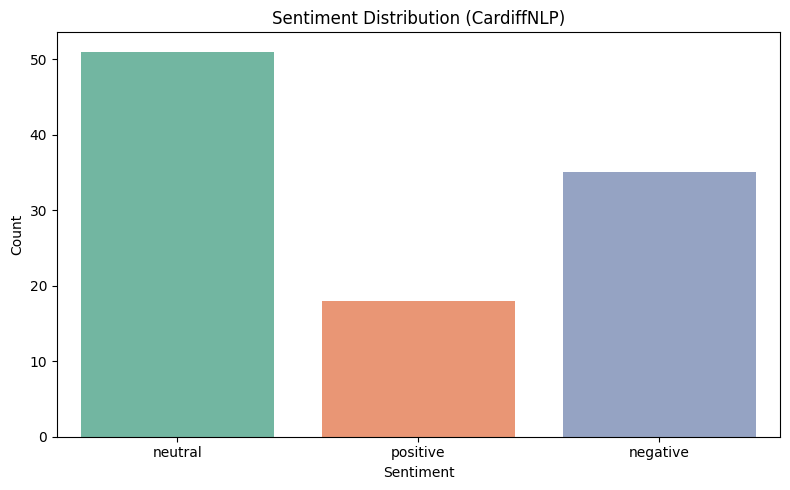

In [31]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_predicted, x='cardiffnlp_sentiment', palette='Set2')
plt.title('Sentiment Distribution (CardiffNLP)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
